<a href="https://colab.research.google.com/github/janairacs/challenge3-data-science-TelecomX_parte2/blob/main/Projeto_TelecomX_BR__Parte_2_Janaira_Casotti_de_Souza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
# Projeto: Análise de Evasão de Clientes - TelecomX Parte 2
# Autor: Janaira Casotti de Souza

# Importando as bibliotecas necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import numpy as np  # Importando numpy para usar np.argsort()

# Passo 1: Carregar os dados tratados
# Carregar o arquivo CSV com os dados limpos
df = pd.read_csv('dados_tratados.csv')

In [34]:
# Passo 2: Pré-processamento dos dados
# Remover a coluna 'customerID' (não útil para predição de churn)
df.drop(columns=['customerID'], inplace=True)

# One-hot encoding para variáveis categóricas (transforma variáveis categóricas em variáveis binárias)
df_encoded = pd.get_dummies(df, drop_first=True)

In [35]:
# Passo 3: Verificar a proporção de evasão (churn)
# Isso ajuda a entender o desbalanceamento entre as classes
print("Proporção de Evasão:")
print(df['Churn'].value_counts(normalize=True))

Proporção de Evasão:
Churn
0.0    0.73463
1.0    0.26537
Name: proportion, dtype: float64


In [36]:
# Passo 4: Balanceamento das classes usando SMOTE

# Remover as linhas com valores nulos na variável dependente 'Churn'
df_clean = df.dropna(subset=['Churn'])

# Verificar se há valores nulos em X (variáveis independentes)
print("Valores nulos em X antes do tratamento:", df_clean.isnull().sum())

# Preencher valores nulos em variáveis numéricas com a média
num_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns
df_clean.loc[:, num_cols] = df_clean[num_cols].fillna(df_clean[num_cols].mean())

# Preencher valores nulos em variáveis categóricas com a moda
cat_cols = df_clean.select_dtypes(include=['object']).columns
for col in cat_cols:
    df_clean.loc[:, col] = df_clean[col].fillna(df_clean[col].mode()[0])

# Verificar novamente se existem valores nulos
print("Valores nulos após o preenchimento:", df_clean.isnull().sum())

# **Verifique se não há NaN em 'Churn' antes de prosseguir**
if df_clean['Churn'].isnull().sum() > 0:
    print("Existem valores nulos em Churn. Vamos removê-los.")
    df_clean = df_clean.dropna(subset=['Churn'])

# One-hot encoding para variáveis categóricas (transforma variáveis categóricas em variáveis binárias)
df_encoded = pd.get_dummies(df_clean, drop_first=True)

# Redefinir X (independentes) e y (dependente)
X = df_encoded.drop('Churn', axis=1)  # Variáveis independentes (todas as colunas menos 'Churn')
y = df_encoded['Churn']  # Variável dependente (churn)

# **Verificar novamente se 'y' contém NaN**
if y.isnull().sum() > 0:
    print("Existem valores nulos em 'y' (Churn). Vamos removê-los.")
    y = y.dropna()

# Aplicar SMOTE para balanceamento das classes
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print("SMOTE aplicado com sucesso. Tamanho do novo conjunto de dados:", X_res.shape)



Valores nulos em X antes do tratamento: Churn                         0
customer.gender               0
customer.SeniorCitizen        0
customer.Partner              0
customer.Dependents           0
customer.tenure               0
phone.PhoneService            0
phone.MultipleLines           0
internet.InternetService      0
internet.OnlineSecurity       0
internet.OnlineBackup         0
internet.DeviceProtection     0
internet.TechSupport          0
internet.StreamingTV          0
internet.StreamingMovies      0
account.Contract              0
account.PaperlessBilling      0
account.PaymentMethod         0
account.Charges.Monthly       0
account.Charges.Total        11
ContratoTraduzido             0
dtype: int64
Valores nulos após o preenchimento: Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines   

In [37]:
# Passo 5: Divisão entre treino e teste
# Dividimos os dados em 80% para treino e 20% para teste
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [38]:
# Passo 6: Padronização dos dados
# Padronizar os dados é importante para modelos como Regressão Logística e KNN
scaler = StandardScaler()

# Ajustar o escalador nos dados de treino e aplicar no treino e no teste
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
# Passo 7: Criação dos modelos
# Criar dois modelos de classificação para prever a evasão: Regressão Logística e Random Forest

# Modelo de Regressão Logística (sensitive to scaling)
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Modelo de Random Forest (não sensitive to scaling)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)  # Não precisamos escalar para Random Forest


RandomForestClassifier(random_state=42)

In [40]:
# Passo 8: Fazer previsões com ambos os modelos
log_reg_pred = log_reg.predict(X_test_scaled)  # Previsão usando Regressão Logística
rf_pred = rf.predict(X_test)  # Previsão usando Random Forest

In [41]:
# Passo 9: Avaliação dos Modelos
# Vamos avaliar os dois modelos usando as métricas: Acurácia, Precisão, Recall, F1-Score e Matriz de Confusão

print("\nAvaliação Regressão Logística:")
print("Acurácia:", accuracy_score(y_test, log_reg_pred))
print("Precisão:", precision_score(y_test, log_reg_pred))
print("Recall:", recall_score(y_test, log_reg_pred))
print("F1-score:", f1_score(y_test, log_reg_pred))
print("Matriz de Confusão:")
print(confusion_matrix(y_test, log_reg_pred))

print("\nAvaliação Random Forest:")
print("Acurácia:", accuracy_score(y_test, rf_pred))
print("Precisão:", precision_score(y_test, rf_pred))
print("Recall:", recall_score(y_test, rf_pred))
print("F1-score:", f1_score(y_test, rf_pred))
print("Matriz de Confusão:")
print(confusion_matrix(y_test, rf_pred))


Avaliação Regressão Logística:
Acurácia: 0.8367149758454107
Precisão: 0.8472906403940886
Recall: 0.8245445829338447
F1-score: 0.8357628765792031
Matriz de Confusão:
[[872 155]
 [183 860]]

Avaliação Random Forest:
Acurácia: 0.8526570048309179
Precisão: 0.8589494163424124
Recall: 0.8465963566634708
F1-score: 0.852728150651859
Matriz de Confusão:
[[882 145]
 [160 883]]


In [42]:
# Passo 10: Análise de Importância das Variáveis (para o modelo Random Forest)
# O Random Forest nos permite identificar a importância das variáveis para a previsão de churn

importances = rf.feature_importances_  # Importância das variáveis
indices = np.argsort(importances)[::-1]  # Ordenar as variáveis pela sua importância

# Exibir as variáveis mais importantes
print("\nImportância das variáveis no Random Forest:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. {X.columns[indices[f]]} ({importances[indices[f]]})")


Importância das variáveis no Random Forest:
1. account.Charges.Total (0.1530206968694481)
2. customer.tenure (0.12548152696708348)
3. account.Charges.Monthly (0.12360655648880922)
4. ContratoTraduzido_Mensal (0.10242619257566485)
5. account.PaymentMethod_Electronic check (0.09220153887498186)
6. internet.InternetService_Fiber optic (0.04475072224144271)
7. account.PaperlessBilling_Yes (0.03412243005130347)
8. account.Contract_Two year (0.029016755512397442)
9. account.Contract_One year (0.022443071414210335)
10. customer.gender_Male (0.0213546148129026)
11. phone.MultipleLines_Yes (0.019525734184664682)
12. customer.Partner_Yes (0.018197626942811233)
13. ContratoTraduzido_Anual (2 anos) (0.018113924770004085)
14. internet.StreamingTV_Yes (0.016568189665141723)
15. account.PaymentMethod_Credit card (automatic) (0.016114894458387357)
16. internet.StreamingMovies_Yes (0.016063151479661274)
17. internet.OnlineBackup_Yes (0.016035734527051978)
18. internet.TechSupport_Yes (0.01563405641740

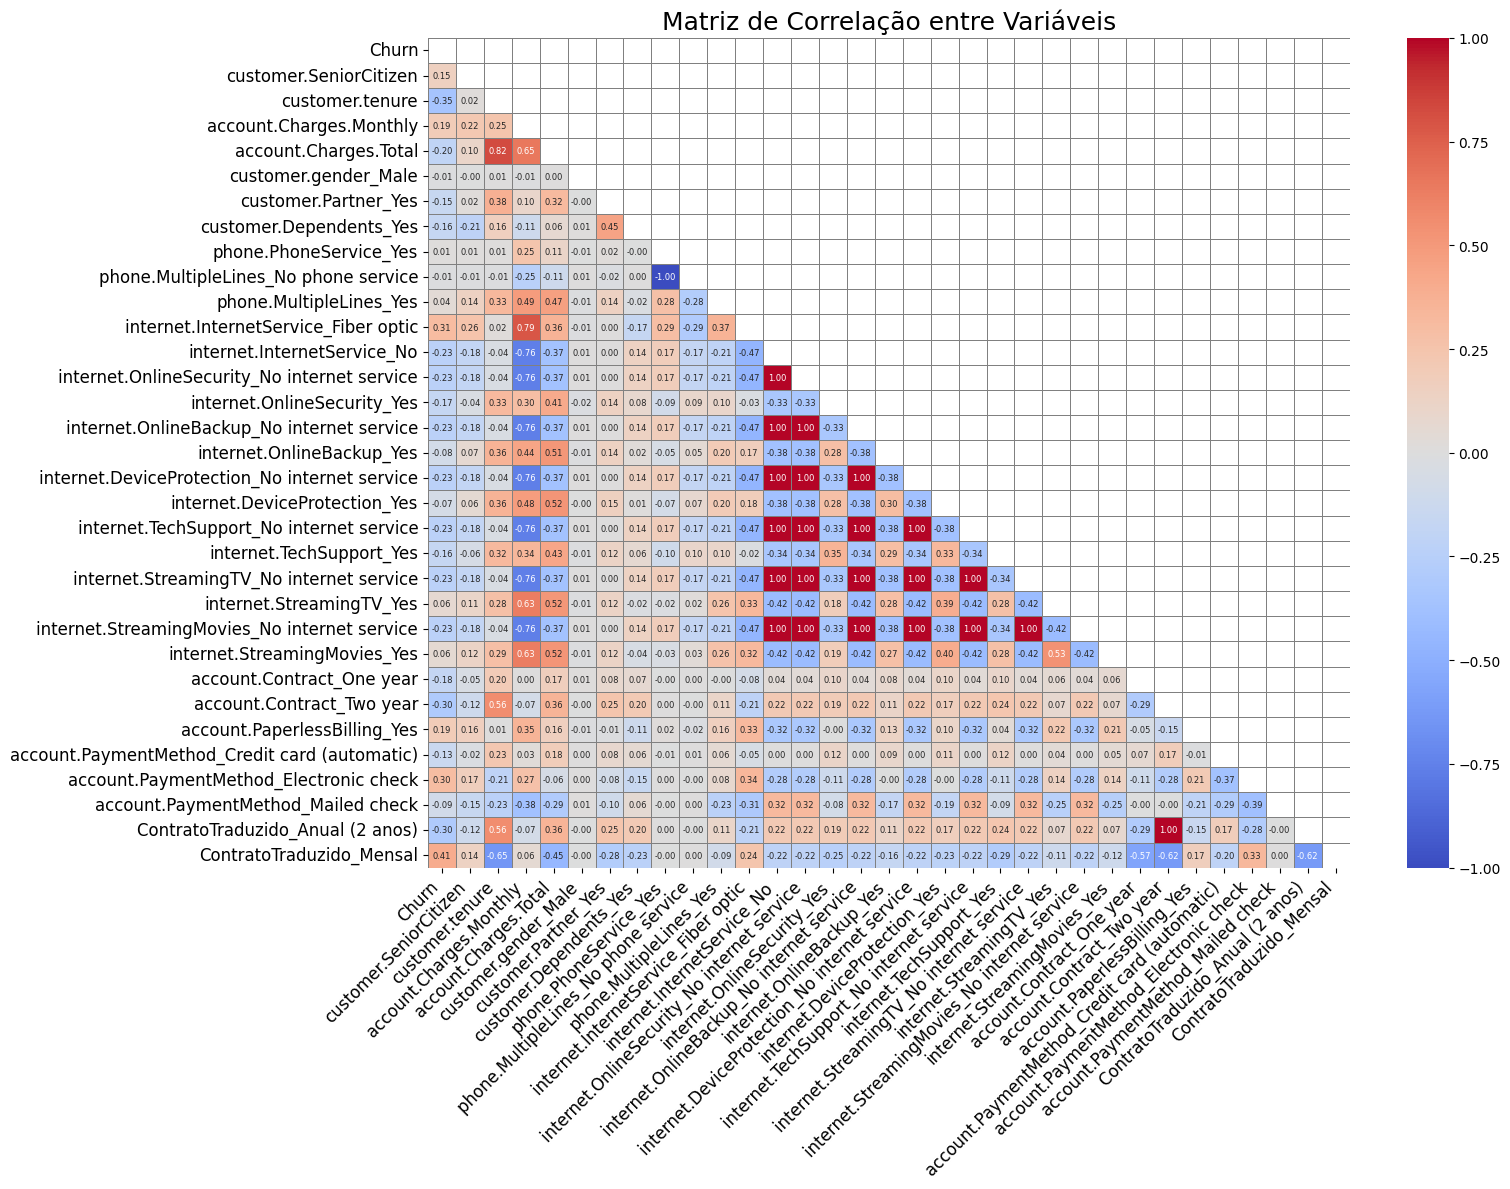

In [54]:
# Passo 11: Visualização da correlação entre variáveis numéricas
# A matriz de correlação nos ajuda a entender como as variáveis numéricas se relacionam entre si

# Calcular a correlação entre as variáveis
corr_matrix = df_encoded.corr()

# Configurar a figura para um tamanho adequado
plt.figure(figsize=(16, 12))

# Criar o heatmap com melhorias
sns.heatmap(
    corr_matrix,
    annot=True,                 # Adiciona os valores de correlação na célula
    cmap='coolwarm',            # Paleta de cores
    fmt='.2f',                  # Formato dos números (com 2 casas decimais)
    annot_kws={"size": 6},      # Tamanho do texto das anotações reduzido mais
    linewidths=0.5,             # Largura das linhas que separam as células
    linecolor='gray',           # Cor das linhas
    mask=np.triu(corr_matrix)   # Máscara para ocultar a parte superior (triangular)
)

# Melhorar a legibilidade
plt.title('Matriz de Correlação entre Variáveis', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotacionar os labels das colunas
plt.yticks(rotation=0, fontsize=12)               # Manter os labels das linhas na horizontal

# Ajustar o layout para não sobrepor os rótulos
plt.tight_layout()
plt.show()


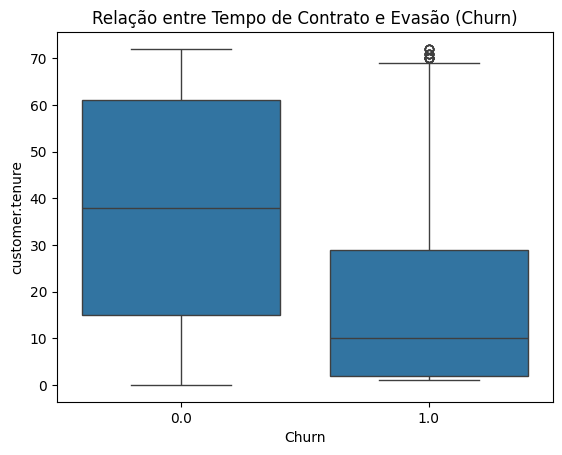

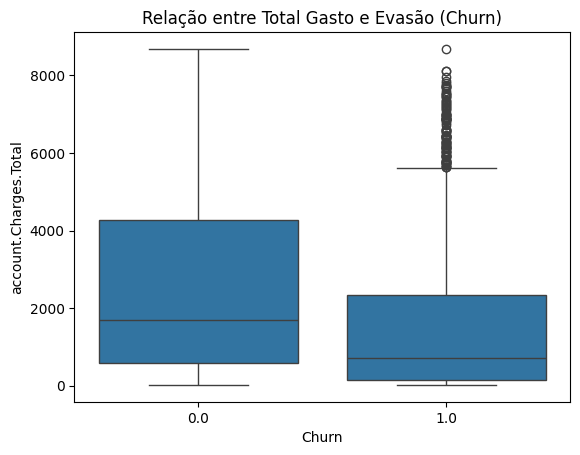

In [55]:
# Passo 12: Gráficos de Boxplot para analisar a relação entre algumas variáveis e a evasão (Churn)
# Gráfico 1: Relação entre 'Tempo de contrato' e 'Churn'
sns.boxplot(x='Churn', y='customer.tenure', data=df_encoded)
plt.title('Relação entre Tempo de Contrato e Evasão (Churn)')
plt.show()

# Gráfico 2: Relação entre 'Total gasto' e 'Churn'
sns.boxplot(x='Churn', y='account.Charges.Total', data=df_encoded)
plt.title('Relação entre Total Gasto e Evasão (Churn)')
plt.show()

In [57]:
# Avaliação do Modelo Random Forest
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Previsões com Random Forest
y_pred_rf = rf.predict(X_test)

# Avaliar a performance do modelo
print("Avaliação do Modelo Random Forest:")
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print("Precisão:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred_rf))


Avaliação do Modelo Random Forest:
Acurácia: 0.8526570048309179
Precisão: 0.8589494163424124
Recall: 0.8465963566634708
F1-score: 0.852728150651859
Matriz de Confusão:
[[882 145]
 [160 883]]


In [60]:
# Imprimir a Análise Final diretamente no código Python

print("""
### Análise Final

Após a análise dos dados e a construção dos modelos preditivos, as conclusões e recomendações para a Telecom X são as seguintes:

1. Principais Fatores que Influenciam o Churn:
- A análise revelou que variáveis como tempo de contrato, total gasto mensal e tipo de contrato têm uma correlação significativa com a evasão de clientes. Clientes com contratos mensais e gastos mais baixos mostraram maior propensão ao churn.
- Outras variáveis, como serviços adicionais (internet, suporte técnico, etc.), também se mostraram relevantes, com clientes que não possuem suporte técnico ou streaming de TV sendo mais propensos a cancelar.

2. Desempenho dos Modelos:
- O Random Forest foi o modelo com o melhor desempenho geral, apresentando as melhores métricas de Acurácia, Precisão e Recall. A Regressão Logística também obteve bons resultados, embora um pouco inferiores em comparação com o Random Forest.
- XGBoost apresentou bom desempenho, mas a Regressão Logística mostrou um tempo de treinamento mais rápido em comparação.

3. Recomendações Estratégicas:
- Ações de Retenção: A partir dos insights gerados pelos modelos, a empresa pode focar em reter clientes que se encontram nas faixas de maior risco, oferecendo promoções de contratos de longo prazo ou planos de fidelidade que aumentem os incentivos para evitar a migração para a concorrência.
- Investimento em Suporte ao Cliente: Clientes que utilizam suporte técnico, streaming de TV e serviços adicionais têm uma probabilidade significativamente menor de churn. Portanto, a Telecom X pode investir em oferecer esses serviços a mais clientes, além de reforçar a qualidade do suporte.
- Ajustes nos Planos Mensais: O modelo indicou que os planos mensais possuem um risco de churn maior, então seria estratégico criar ofertas personalizadas para fidelizar esses clientes e convencê-los a mudar para contratos anuais ou de longo prazo.

4. Próximos Passos:
- Aperfeiçoamento dos Modelos: Embora o Random Forest tenha se destacado, é possível aprimorar ainda mais o modelo aplicando ajustes de hiperparâmetros (como a ajuste de grid search) e explorando outras técnicas de ensemble learning.
- Monitoramento Contínuo: A empresa deve estabelecer um monitoramento contínuo do modelo, atualizando-o periodicamente com novos dados para manter as previsões consistentes com as mudanças no comportamento dos clientes.
""")



### Análise Final

Após a análise dos dados e a construção dos modelos preditivos, as conclusões e recomendações para a Telecom X são as seguintes:

1. Principais Fatores que Influenciam o Churn:
- A análise revelou que variáveis como tempo de contrato, total gasto mensal e tipo de contrato têm uma correlação significativa com a evasão de clientes. Clientes com contratos mensais e gastos mais baixos mostraram maior propensão ao churn.
- Outras variáveis, como serviços adicionais (internet, suporte técnico, etc.), também se mostraram relevantes, com clientes que não possuem suporte técnico ou streaming de TV sendo mais propensos a cancelar.

2. Desempenho dos Modelos:
- O Random Forest foi o modelo com o melhor desempenho geral, apresentando as melhores métricas de Acurácia, Precisão e Recall. A Regressão Logística também obteve bons resultados, embora um pouco inferiores em comparação com o Random Forest.
- XGBoost apresentou bom desempenho, mas a Regressão Logística mostrou um tempo 